In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# методы по работе со сл. вел
stats.rv_continuous


scipy.stats._distn_infrastructure.rv_continuous

In [11]:
# РАБОТА С ДИСКРЕТНЫМИ РАСПРЕДЕЛЕНИЯМИ
stats.rv_discrete

scipy.stats._distn_infrastructure.rv_discrete

In [4]:
rv_bernoulli = stats.bernoulli(p=0.3)

In [7]:
rv_bernoulli.rvs(14)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [8]:
# биномиальное распределение, обобщение
# метода Бернулли, только здесь успех и неудач в n экспериментах
rv_binom = stats.binom(100, p = 0.9)

In [9]:
rv_binom.rvs(8)

array([93, 94, 89, 91, 92, 88, 90, 91])

(array([ 1.,  1.,  8.,  5.,  4., 22.,  9., 19.,  6.,  5.]),
 array([82. , 83.4, 84.8, 86.2, 87.6, 89. , 90.4, 91.8, 93.2, 94.6, 96. ]),
 <a list of 10 Patch objects>)

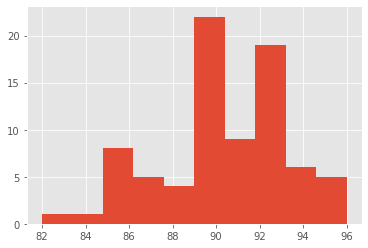

In [10]:
plt.hist(rv_binom.rvs(80), bins=10)

In [12]:
# РАБОТА С НЕПРЕРЫВНЫМИ РАСПРЕДЕЛЕНИЯМИ

In [13]:
a = 5
b = 10

rv_uniform = stats.uniform(a, b-a)

In [22]:
rv_uniform.cdf(6)

0.2

Text(0.5, 1.0, 'Commulative distribution function for uniform')

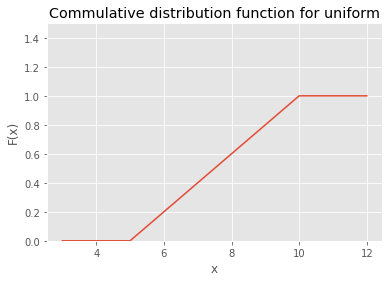

In [21]:
X = np.linspace(a-2, b+2, 100)
cdf = rv_uniform.cdf(X)
plt.plot(X, cdf)

plt.ylabel('F(x)')
plt.xlabel('x')
plt.ylim([0,1.5]);
plt.title(u'Commulative distribution function for uniform')

Text(0.5, 1.0, 'PDF for uniform')

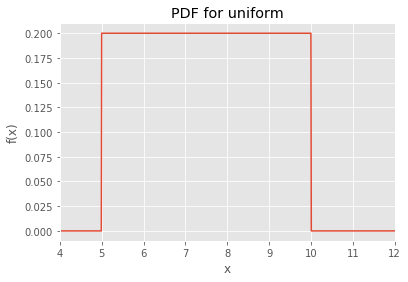

In [23]:
# распределение плотности вероятности

X = np.linspace(a-2, b+2, 1000)
pdf = rv_uniform.pdf(X)
plt.plot(X, pdf)

plt.ylabel('f(x)')
plt.xlabel('x')
#plt.ylim([0,1.5]);
plt.xlim([4,12]);
plt.title(u'PDF for uniform')

In [24]:
# нормальное распределение


In [26]:
mu = 2
sigma = 0.5

rv_norm = stats.norm(loc=mu, scale=sigma)
rv_norm.rvs(17)

array([1.57825629, 1.77140109, 2.60335391, 2.13119591, 2.21977052,
       2.37240687, 1.24380726, 1.90219496, 1.26736319, 1.95207135,
       1.11757248, 1.51200932, 1.65749816, 1.43220622, 1.56061068,
       2.39929554, 1.72829886])

(array([  18.,   93.,  497., 1338., 2507., 2768., 1821.,  749.,  182.,
          27.]),
 array([0.16412098, 0.51946843, 0.87481587, 1.23016332, 1.58551077,
        1.94085822, 2.29620567, 2.65155311, 3.00690056, 3.36224801,
        3.71759546]),
 <a list of 10 Patch objects>)

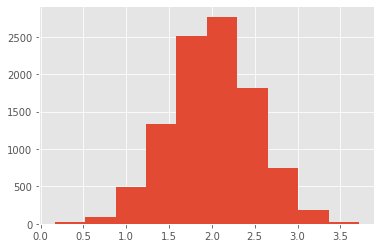

In [32]:
plt.hist(rv_norm.rvs(10000))

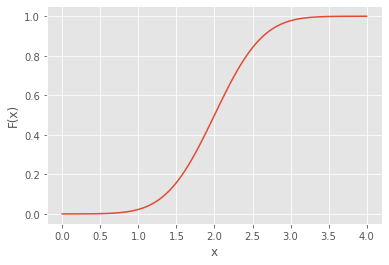

In [37]:
# функция распределения

x = np.linspace(0,4,100)
cdf = rv_norm.cdf(x)
plt.plot(x, cdf)
plt.ylabel('F(x)');
plt.xlabel('x');

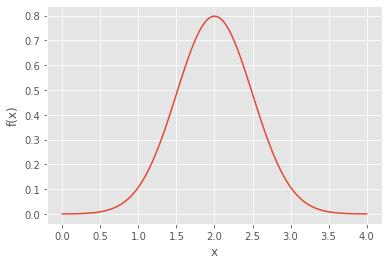

In [38]:
# плотность вероятности
x = np.linspace(0,4,100)
pdf = rv_norm.pdf(x)
plt.plot(x, pdf)

plt.ylabel('f(x)');
plt.xlabel('x');

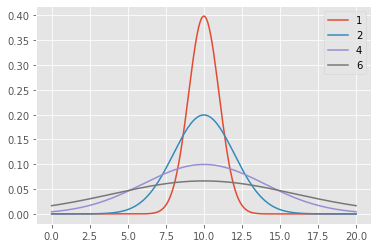

In [39]:
means = [1,5,10]
mu = 10
sigmas = [1,2,4,6]
for sigma in sigmas:
    rv_norm = stats.norm(loc=mu, scale = sigma)
    x = np.linspace(0,20,200)
    cdf = rv_norm.pdf(x)
    plt.plot(x, cdf, label = sigma)
    
plt.legend();

In [40]:
mean, var, skew = rv_norm.stats(moments = 'mvs')

In [41]:
# параметр смещенности
skew

array(0.)

In [42]:
mean

array(10.)

In [43]:
var

array(36.)

In [45]:
#доверительный интервал
# для оценки дисперсии и выборки

In [1]:
import random 
from tqdm import tqdm
import pandas as pd
from PIL import Image


In [ ]:
# поиск доверительного интервала 
#при известной Дисперсии норм расп

In [3]:
def show_svg(url):
    return SVG(url)

In [5]:
# нужен файл в директории с таким именем
Image.open('800px-The_Normal_Distribution.svg.png')

FileNotFoundError: [Errno 2] No such file or directory: '800px-The_Normal_Distribution.svg.png'

In [6]:
#зафиксируем некоторое исходное распределение

population = stats.norm.rvs(loc=2, scale=5, size=100000)


In [7]:
#сделаем сэмпл из данного распр

sample_size = 100
sample = np.random.choice(a= population, size = sample_size)

In [ ]:
# найдем выборочное среднее и дисп по ген совокуп

In [14]:
sample_mean = sample.mean()
st_dev = population.std()

In [15]:
# найдем z-value, соответствующий 95%
# ppf - propability persentil function

z_value = stats.norm.ppf(q = 0.975)
print("z-value:", z_value)

z-value: 1.959963984540054


In [16]:
# find left side

stats.norm.ppf(q=0.025)

-1.9599639845400545

In [17]:
# lets find confidence interval

interval = z_value * (st_dev/np.sqrt(sample_size))
conf_inv = (sample_mean - interval, sample_mean+interval)

print("Confidence interval:", conf_inv)


Confidence interval: (2.0701091906941445, 4.023392733259915)


In [18]:
# собрали в одну кучу

def compute_ci(sample, st_dev):
    
    z_value = stats.norm.ppf(q = 0.975)
    sample_size = len(sample)
    interval = z_value * (st_dev/np.sqrt(sample_size))
    conf_inv = (sample_mean - interval, sample_mean + interval)
    
    return conf_inv

In [19]:
print(conf_inv)

(2.0701091906941445, 4.023392733259915)


In [22]:
# поменяли размерность выборки, распределение осталось
np.random.seed(5)
sample_size = 2000
sample = np.random.choice(a = population, size = sample_size)

ci = compute_ci(sample, st_dev)

print("conf interval for 2000 sample size:", ci)

conf interval for 2000 sample size: (2.8283672229515964, 3.2651347010024634)


In [23]:
# распределение Стьюдента позволяет
#найти доверительный интервал при маленьких 
#выборках и неизвестной дисперсии

In [24]:
def compute_ci_t(sample, alpha = 0.95):
    
    n = sample.shape[0]
    mu, se = np.mean(sample), stats.sem(sample)
    bound = se * stats.t.ppf((1+alpha)/2., n-1)
    
    return mu - bound, mu + bound

In [25]:
sample = np.random.choice(a=population, size = 30)
ci_t = compute_ci_t(sample, alpha=0.95)
print("conf interval with t test for 2000 sample size:", ci_t)

conf interval with t test for 2000 sample size: (-0.8570980458227229, 3.165780887273529)


In [26]:
# АНАЛИЗ ВЫБОРКИ ПРИ НЕИЗВЕСТНОМ РАСПРЕДЕЛЕНИИ

In [36]:
taxi_mex = pd.read_csv('data/taxi-routes/mex_clean.csv')

In [37]:
taxi_mex.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,México DF Taxi de Sitio,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242
1,2,México DF Taxi Libre,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538,N,14110,1700,461


In [15]:
def generate_distribution_sample(data, sample_size, dist_size):
    
    sample_means = []
    for i in tqdm(range(dist_size)):
        sample = np.random.choice(a = data, size = sample_size)
        sample_means.append(np.mean(sample))
    
    return sample_means

In [16]:
sample_size = 10000
dist_size = 50000

In [38]:
sample_means = generate_distribution_sample(taxi_mex['dist_meters']/1000, sample_size, dist_size)

100%|██████████| 50000/50000 [00:10<00:00, 4931.40it/s]


Text(0.5, 0, 'distance')

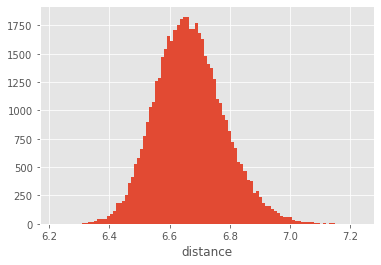

In [39]:
# РЕШИТЬ ПРОБЛЕМУ !!!

plt.hist(sample_means, bins=100)
plt.xlabel('distance')

In [44]:
taxi_mex['dist_meters'].mean()

6666.431700015755

In [25]:
# ПРОВЕРКА ГИПОТЕЗ ПО СТЬЮДЕНТУ



In [26]:
taxi_bog = pd.read_csv('data/taxi-routes/bog_clean.csv')
taxi_mex = pd.read_csv('data/taxi-routes/mex_clean.csv')

In [28]:
taxi_mex.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,México DF Taxi de Sitio,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242
1,2,México DF Taxi Libre,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538,N,14110,1700,461


In [29]:
# необходимо определить нулевую гипотезу, 
#в случае сравнения со средними мы предполагаем что
#средние значения по двум выборкам равны и альтернативу
#необходимо вычислить p-value. Если р-значение маленькое значение, то
#скорее всего не происходит случайных процессов
#а если большое, то вероятность случайных событий высока


In [30]:
# 3 cases of using t-stats of Student

In [31]:
# Одновыборочный t-критерий

In [33]:
sample = taxi_mex['wait_sec'].sample(n=3000)/60

In [46]:
# t-статистика, p-value лучше рассматривать на 5% уровне значимости
stats.ttest_1samp(sample, 10)

Ttest_1sampResult(statistic=1.3441031003863395, pvalue=0.17901671684917553)

In [45]:
#2 выборочный критерий для независимых выборок

In [48]:
taxi_mex.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,México DF Taxi de Sitio,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242


In [52]:
taxi_mex['pickup_datetime'] = pd.to_datetime(taxi_mex.pickup_datetime)
taxi_mex['month'] = taxi_mex['pickup_datetime'].dt.month

In [53]:
taxi_bog.shape

(3063, 12)

In [54]:
taxi_mex.shape

(12694, 13)

In [55]:
#Отличается ли средняя длительность поездки
#по Мехико и Боготе?

In [56]:
stats.ttest_ind(taxi_mex['trip_duration'].sample(n=3000),
                taxi_bog['trip_duration'].sample(n=3000))

Ttest_indResult(statistic=-6.1678015202018015, pvalue=7.376300088451006e-10)

In [57]:
stats.ttest_ind(taxi_mex['wait_sec'].sample(n=3000),
                taxi_bog['wait_sec'].sample(n=3000))

Ttest_indResult(statistic=1.0942688281433914, pvalue=0.27388103399123204)

In [58]:
# не можем отвергнуть нулевую гипотезу, в среднем ожидание одинаковое

In [59]:
# 2 выборочный критерий для зависимых выборок

In [65]:
control = taxi_mex[taxi_mex.month == 11]['trip_duration'].sample(n=1000)
treatment = taxi_mex[taxi_mex.month == 12]['trip_duration'].sample(n=1000)

stats.ttest_rel(control, treatment)                                        
                                        
                                        

Ttest_relResult(statistic=-1.1695732668862737, pvalue=0.24245170769141758)